<a href="https://colab.research.google.com/github/Felixe360/Module-3-Assignments/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /content


In [6]:
import pandas as pd

df = pd.read_csv("/content/car_claims.csv")
display(df.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,1,none,3 years,26 to 30,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,4,none,6 years,31 to 35,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,3,1,7 years,41 to 50,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,2,1,more than 7,51 to 65,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,1,none,5 years,31 to 35,none,no change,1 vehicle,1994,Collision,No


In [7]:
df['VehiclePrice']

,VehiclePrice
0,"more than 69,000"
1,"more than 69,000"
2,"more than 69,000"
3,"20,000 to 29,000"
4,"more than 69,000"
...,...
14984,"20,000 to 29,000"
14985,"30,000 to 39,000"
14986,"20,000 to 29,000"
14987,"20,000 to 29,000"


In [29]:

#df=df.drop(columns=['policy_number','policy_bind_date', 'incident_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14989 entries, 0 to 14988
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Month                14989 non-null  object
 1   WeekOfMonth          14989 non-null  int64 
 2   DayOfWeek            14989 non-null  object
 3   Make                 14989 non-null  object
 4   AccidentArea         14989 non-null  object
 5   DayOfWeekClaimed     14989 non-null  object
 6   MonthClaimed         14989 non-null  object
 7   WeekOfMonthClaimed   14989 non-null  int64 
 8   Sex                  14989 non-null  object
 9   MaritalStatus        14989 non-null  object
 10  Age                  14989 non-null  int64 
 11  Fault                14989 non-null  object
 12  PolicyType           14989 non-null  object
 13  VehicleCategory      14989 non-null  object
 14  VehiclePrice         14989 non-null  object
 15  RepNumber            14989 non-null  int64 
 16  Driv

## Preproccessing

In this analysis, polynomial and interation terms will be applied. The polynomial will be applied to age because my theory is that as people get older they are more financialy stable and wouldn't need to commit fraud especially with the concequences of getting caught. On the other hand, younger individuals are less financialy stable and are more likey to find ways to reduce thier financial burden from an accident. Next, The interaction term will be age and gender. Majority of people usually mention that men are more likey to get into accidents due to their risky behavior and it would a good idea to determine whether they are more likey to commit fraud and how it changes with age.

In [30]:
# Add Polynomial of age
df['Age2'] = df.Age ** 2

#Add interaction
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['age_gender'] = df['Age'] * df['Sex']

#drop unncessary columns
df = df.drop(columns=['AgeOfPolicyHolder', 'Year'])

#make target boolen
df['FraudFound'] = df['FraudFound'].map({'Yes': 1, 'No': 0})

In [31]:

# Change data type (these behave more like categorical variables)
df['RepNumber'] = df['RepNumber'].astype('category')
#df['Deductible'] = df['Deductible'].astype('category')
df['DriverRating'] = df['DriverRating'].astype('category')


In [32]:

display(df.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,DriverRating,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound,Age2,age_gender
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,0,Single,...,1,none,3 years,none,1 year,3 to 4,Liability,0,441,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,1,Single,...,4,none,6 years,none,no change,1 vehicle,Collision,0,1156,34
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,1,Married,...,3,1,7 years,none,no change,1 vehicle,Collision,0,2209,47
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,1,Married,...,2,1,more than 7,more than 5,no change,1 vehicle,Liability,0,4225,65
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,0,Single,...,1,none,5 years,none,no change,1 vehicle,Collision,0,729,0


In [1]:
df.columns

NameError: name 'df' is not defined

In [16]:
## Multi-collniearty Analysis

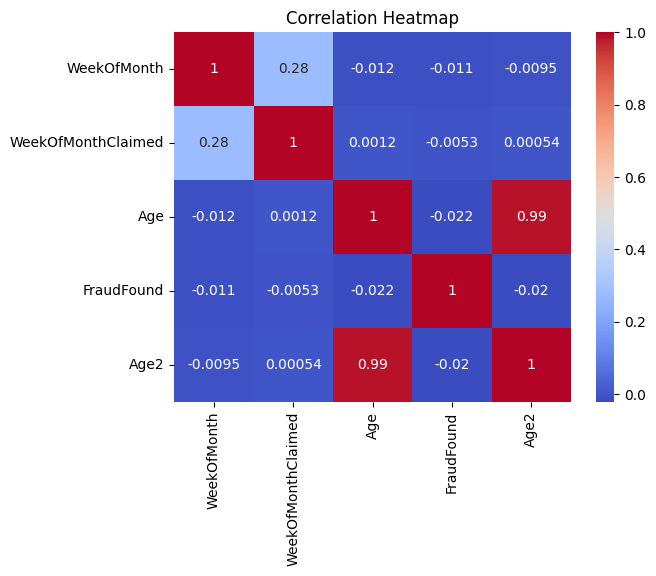

In [17]:
corr = df.select_dtypes(int).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This dataset only has a few numeric columns relative to categorical and some of the numeric columns can be concidered categorical. For example, RepNumber identifies a sales representative and may be better represented as a categorical variable to capture the difference in sales reps.

Before modeling a logistic regression, its important to identify  multicollinearity between variables. From the Heatmap above, multicollinearity doesn't seem to be an issue in this dataset with the exception of age and age2, which is expected since age2 is a derived feature ( Age squared)

In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["feature"] = df.select_dtypes(int).columns
vif_df["VIF"] = [variance_inflation_factor(df.select_dtypes(int).values, i) for i in range(df.select_dtypes(int).shape[1])]
print(vif_df)

              feature        VIF
0         WeekOfMonth   5.999609
1  WeekOfMonthClaimed   5.916377
2                 Age  39.844162
3          FraudFound   1.061899
4                Age2  21.108378


In [33]:
# Identify categorical columns in df
categorical_cols_df = df.select_dtypes(include='object').columns

# Apply one-hot encoding to df
df_encoded = pd.get_dummies(df, columns=categorical_cols_df, drop_first=True)

# Update df with the encoded DataFrame
df = df_encoded
#df_encoded.to_csv('encoded_df.csv', index=False)
df_encoded.head()

,WeekOfMonth,WeekOfMonthClaimed,Sex,Age,RepNumber,DriverRating,FraudFound,Age2,age_gender,Month_Aug,...,AddressChange-Claim_2 to 3 years,AddressChange-Claim_4 to 8 years,AddressChange-Claim_no change,AddressChange-Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,5,1,0,21,12,1,0,441,0,False,...,False,False,False,False,False,True,False,False,False,True
1,3,4,1,34,15,4,0,1156,34,False,...,False,False,True,False,False,False,False,False,True,False
2,5,2,1,47,7,3,0,2209,47,False,...,False,False,True,False,False,False,False,False,True,False
3,2,1,1,65,4,2,0,4225,65,False,...,False,False,True,False,False,False,False,False,False,True
4,5,2,0,27,3,1,0,729,0,False,...,False,False,True,False,False,False,False,False,True,False


## Train Test split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define the target variable (y) and features (X)
y = df['FraudFound'].astype(float)
X = df.drop('FraudFound', axis=1).astype(float)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (11991, 101)
Shape of X_test: (2998, 101)
Shape of y_train: (11991,)
Shape of y_test: (2998,)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


## Model

In [117]:
from sklearn.linear_model import LogisticRegression

# Build and train the logistic regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully using scikit-learn.")

Logistic Regression model trained successfully using scikit-learn.


In [118]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the logistic regression model: {accuracy:.4f}")

Accuracy of the logistic regression model: 0.9348


/tmp/ipython-input-1845138467.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='abs_coefficient', y='feature', data=top_features, palette='viridis')


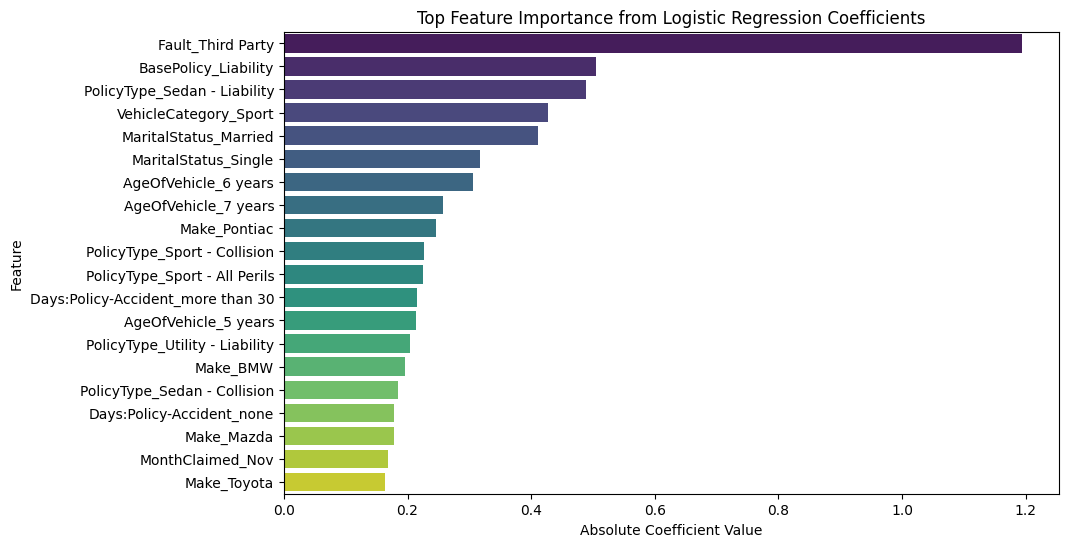

In [124]:
# Get the coefficients from the trained logistic regression model
coefficients = model.coef_[0]

# Get the feature names from the training data
feature_names = X.columns

# Create a DataFrame to store feature names and coefficients
feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Calculate the absolute value of coefficients for ranking
feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])

# Sort the features by absolute coefficient in descending order
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

# Select the top N features to plot (e.g., top 20)
top_n = 20
top_features = feature_importance.head(top_n)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='abs_coefficient', y='feature', data=top_features, palette='viridis')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top Feature Importance from Logistic Regression Coefficients')
plt.show()

In [128]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a mapping of feature names to coefficients
coef_dict = dict(zip(feature_names, coefficients))

# Get the coefficient for 'Age' and 'Age2'
age_coef = coef_dict.get('Age')
age2_coef = coef_dict.get('Age2')
age_gender_coef = coef_dict.get('age_gender')

print(f"Coefficient for Age: {age_coef}")
print(f"Coefficient for Age2: {age2_coef+age_coef}")
print(f"Coefficient for age_gender: {age_gender_coef}")




# Calculate the odds ratios
age_odds_ratio = np.exp(age_coef)
age2_odds_ratio = np.exp(age2_coef)
age_gender_odds_ratio = np.exp(age_gender_coef)

print(f"Odds Ratio for Age: {age_odds_ratio}")
print(f"Odds Ratio for Age2: {age2_odds_ratio}")
print(f"Odds Ratio for age_gender: {age_gender_odds_ratio}")

Coefficient for Age: -0.0647380091963433
Coefficient for Age2: -0.05216468739906935
Coefficient for age_gender: -0.07202485271413778
Odds Ratio for Age: 0.9373129985977946
Odds Ratio for Age2: 1.0126526983345032
Odds Ratio for age_gender: 0.930507769880228


## Conclusion

After developing a logistic Regression, it is determined that incorporating an interaction term and a polynomial doesn't have to much influence in determining the output for the model. However, they still have meaning. For example, as men get older we see a decrease in fraud by about 7% compared to women. Our goal for this project isn't to find causal effects but its good to now some facts about the data that may be valueable in another problem like pricing insurace premiums.

In [34]:
df_encoded.head()

,WeekOfMonth,WeekOfMonthClaimed,Sex,Age,RepNumber,DriverRating,FraudFound,Age2,age_gender,Month_Aug,...,AddressChange-Claim_2 to 3 years,AddressChange-Claim_4 to 8 years,AddressChange-Claim_no change,AddressChange-Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,5,1,0,21,12,1,0,441,0,False,...,False,False,False,False,False,True,False,False,False,True
1,3,4,1,34,15,4,0,1156,34,False,...,False,False,True,False,False,False,False,False,True,False
2,5,2,1,47,7,3,0,2209,47,False,...,False,False,True,False,False,False,False,False,True,False
3,2,1,1,65,4,2,0,4225,65,False,...,False,False,True,False,False,False,False,False,False,True
4,5,2,0,27,3,1,0,729,0,False,...,False,False,True,False,False,False,False,False,True,False


In [35]:
df_encoded.to_csv('encoded_df_final.csv', index=False)